# Assignment 4: Association Rules


### Problem Statement 2:
The Departmental Store, has gathered the data of the products it sells on a Daily basis.
Using Association Rules concepts, provide the insights on the rules and the plots.

### **Business Objective:**
The objective for the Departmental Store is to use the Association Rule Mining technique to uncover patterns and relationships between products sold on a daily basis. By identifying which products are frequently bought together, the store can:

- Optimize product placement.

- Design targeted promotions and bundle offers.

- Improve inventory management to ensure that complementary items are stocked together.

The ultimate goal is to increase sales by understanding customer buying patterns and making informed business decisions based on the identified associations.

In [2]:
import pandas as pd
df=pd.read_csv('groceries.csv', on_bad_lines='skip')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,citrus fruit,semi-finished bread,margarine,ready soups
0,tropical fruit,yogurt,coffee,NaN
1,whole milk,NaN,NaN,NaN
2,pip fruit,yogurt,cream cheese,meat spreads
3,other vegetables,whole milk,condensed milk,long life bakery product
4,rolls/buns,NaN,NaN,NaN


In [3]:
transactions=[]
transactions.append(df.keys().tolist())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
transactions.extend(df.values.tolist())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee', nan],
 ['whole milk', nan, nan, nan],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['rolls/buns', nan, nan, nan],
 ['pot plants', nan, nan, nan],
 ['whole milk', 'cereals', nan, nan],
 ['beef', nan, nan, nan],
 ['frankfurter', 'rolls/buns', 'soda', nan],
 ['chicken', 'tropical fruit', nan, nan],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice', nan, nan, nan],
 ['packaged fruit/vegetables', nan, nan, nan],
 ['chocolate', nan, nan, nan],
 ['specialty bar', nan, nan, nan],
 ['other vegetables', nan, nan, nan],
 ['butter milk', 'pastry', nan, nan],
 ['whole milk', nan, nan, nan],
 ['bottled water', 'canned beer', nan, nan],
 ['yogurt', nan, nan, nan],
 ['sausage', 'rolls/buns', 'soda', 'chocolate'],
 ['other vegetables', nan, nan, nan],
 ['y

In [6]:
#removing nan values from the list
transactions=[[item for item in sublist if not pd.isna(item)] for sublist in transactions]
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['rolls/buns'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk', 'pastry'],
 ['whole milk'],
 ['bottled water', 'canned beer'],
 ['yogurt'],
 ['sausage', 'rolls/buns', 'soda', 'chocolate'],
 ['other vegetables'],
 ['yogurt', 'beverages', 'bottled water', 'specialty bar'],
 ['beef', 'grapes', 'detergent'],
 ['pastry', 'soda'],
 ['fruit/vegetable juice'],
 ['canned beer'],
 ['root vegetables', 'other vegetables', 'whole milk', 'dessert'],
 ['cit

In [7]:
#Step 1: convert the data in a format suitable for apriori
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df=pd.DataFrame(te_ary, columns=te.columns_)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6103,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df=df.astype(int)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#step 2: apply the apriori algorithm to find frequent itemsets
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(df,min_support=0.001,use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [33]:
#step 3: Generate association rules from the frequent itemsets
rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# step 4: output the results
print("frequent itemsets:")
print(frequent_itemsets)
print("\nAssociation rules:")
print(rules)

frequent itemsets:
      support                                         itemsets
0    0.003112                          (Instant food products)
1    0.015558                                       (UHT-milk)
2    0.001310                               (artif. sweetener)
3    0.004913                                  (baking powder)
4    0.001146                               (bathroom cleaner)
..        ...                                              ...
511  0.001146     (rolls/buns, sausage, fruit/vegetable juice)
512  0.001146       (other vegetables, rolls/buns, whole milk)
513  0.001310  (other vegetables, root vegetables, whole milk)
514  0.001146             (other vegetables, whole milk, soda)
515  0.003439                      (rolls/buns, sausage, soda)

[516 rows x 2 columns]

Association rules:
                  antecedents         consequents  antecedent support  \
0                  (UHT-milk)     (bottled water)            0.015558   
1                  (UHT-milk)      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Content-based filtering
recommending items to customers based on the items already present in their carts and generated association rules

In [50]:
def recommend_items(purchased_items, rules_df):
    recommendations = set()
    for _, rule in rules_df.iterrows():
        # Check if any of the purchased items are in the rule's antecedents
        for purchased_item in purchased_items:
            if purchased_item in rule['antecedents']:
                # Add all the items from the rule's consequents to the recommendations
                recommendations.update(rule['consequents'])
    recommendations=recommendations-set(purchased_items)
    return recommendations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
recommend_items(['yogurt', 'other vegetables'],rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'rolls/buns', 'whole milk'}

In [52]:
recommend_items(['yogurt', 'sausage'],rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'rolls/buns', 'soda', 'whole milk'}

In [53]:
recommend_items(['rolls/buns', 'sausage'],rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'soda', 'whole milk'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


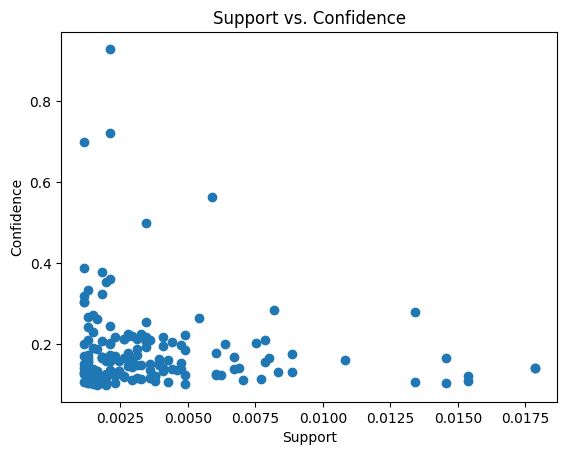

In [42]:
import matplotlib.pyplot as plt
# Scatterplot of support vs. confidence
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


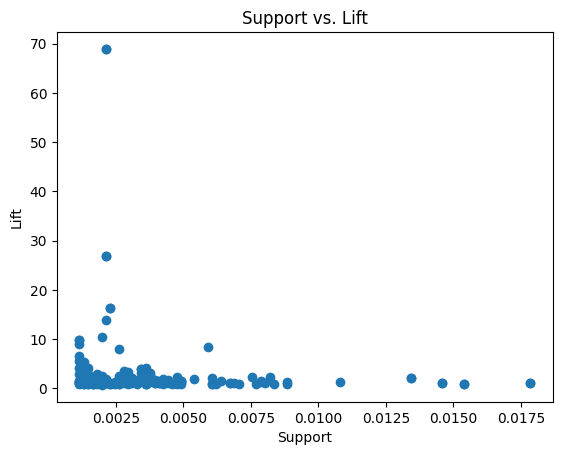

In [44]:
# Scatterplot of support vs. lift
plt.scatter(rules['support'], rules['lift'])
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs. Lift')
plt.show()

In [46]:
# Sort rules by lift in descending order
rules_sorted_by_lift = rules.sort_values('lift', ascending=False)
top_n_rules = rules_sorted_by_lift.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


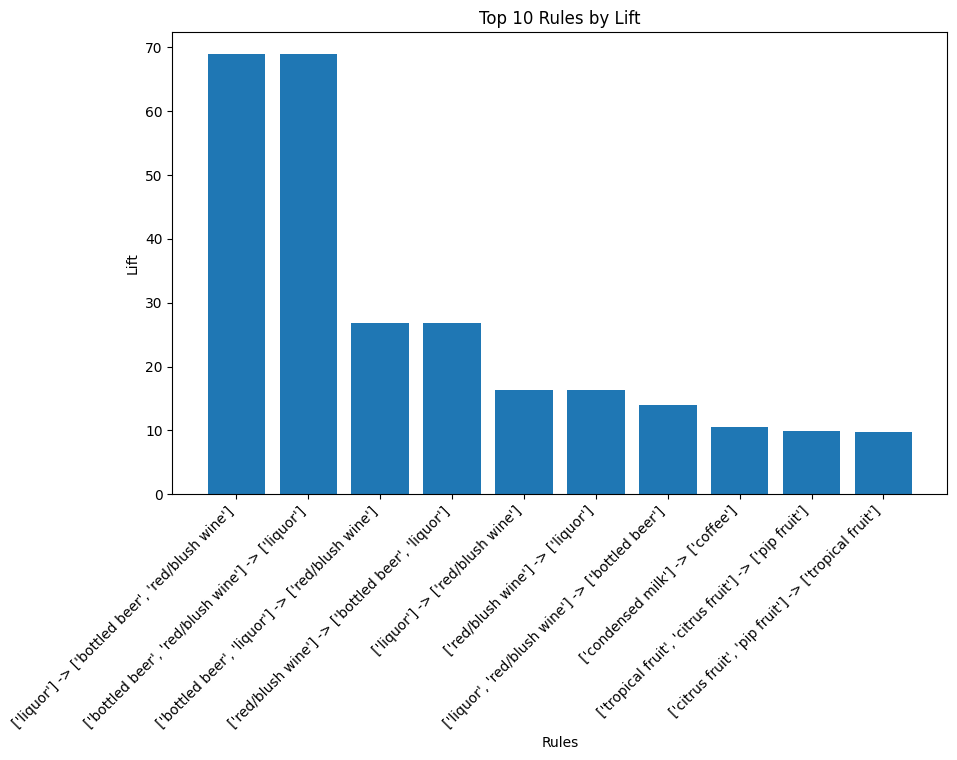

In [47]:
#bar chart for lift
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_n_rules)), top_n_rules['lift'])
plt.xticks(range(len(top_n_rules)), top_n_rules.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1), rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Lift')
plt.title('Top 10 Rules by Lift')
plt.show()

In [48]:
# Sort rules by confidence in descending order
rules_sorted_by_confidence = rules.sort_values('confidence', ascending=False)
top_n_rules = rules_sorted_by_confidence.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


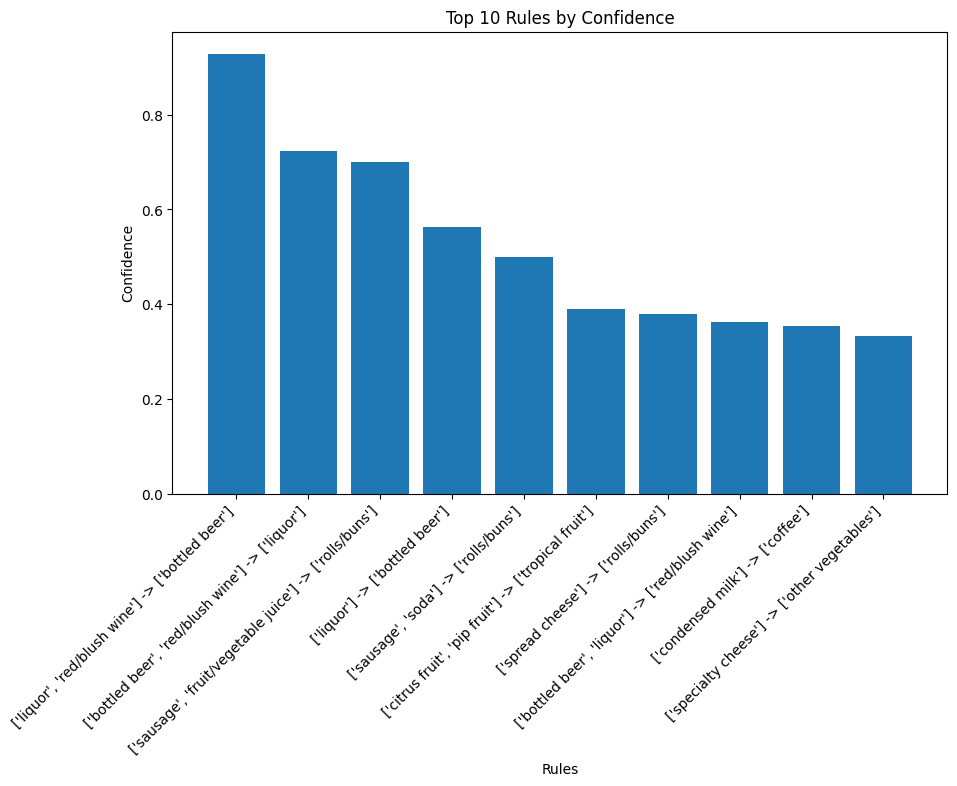

In [49]:
#bar chart for confidence
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_n_rules)), top_n_rules['confidence'])
plt.xticks(range(len(top_n_rules)), top_n_rules.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1), rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Confidence')
plt.title('Top 10 Rules by Confidence')
plt.show()

In [3]:
!git add "PS 2 (groceries).ipynb"
!git commit -m "updated solution for PS 2"
!git push origin main

[main 9dbe299] updated solution for PS 2
 1 file changed, 4398 insertions(+), 4344 deletions(-)
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 8 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 14.13 KiB | 353.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To github.com:parth-gz/Data-Science-Assignments
   b8ceed8..9dbe299  main -> main
